In [1]:
# data link
# https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand


In [2]:
# import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from datetime import datetime
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import random

In [3]:
import warnings
warnings.filterwarnings('ignore')

##### Load the data

In [4]:
df = pd.read_csv (r'D:/MSBA-UTD/5.Course/2Sem/BUAN6341_AML/Assignment1/SeoulBikeData.csv',
                 encoding= 'unicode_escape')

print(df.shape)
df.head()

(8760, 14)


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


##### Cleaning the Data

In [7]:
#rename columns
df.rename({'Rented Bike Count': 'Rented_Bike_Count',
           'Temperature(°C)': 'Temperature', 
           'Humidity(%)': 'Humidity',
          'Wind speed (m/s)': 'Wind_speed',
          'Visibility (10m)': 'Visibility',
          'Dew point temperature(°C)': 'Dew_point_temperature',
          'Solar Radiation (MJ/m2)': 'Solar_Radiation',
          'Rainfall(mm)': 'Rainfall',
          'Snowfall (cm)': 'Snowfall',
          'Functioning Day': 'Functioning_Day'}, 
          axis=1, inplace=True)
df.head(3)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
# convert datetypes of few variables
df['Date'] = pd.to_datetime(df['Date'])

# Add few derived variables to the dataframe - get month and year based on date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday_Name']=df['Date'].dt.day_name()
df['Weekend'] = df['Weekday_Name'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
  
# Get Seoul weather seasons based on month    
# df.loc[df['Month'].isin([3,4,5]), "Season"] = "Spring"
# df.loc[df['Month'].isin([6,7,8]), "Season"] = "Summer"
# df.loc[df['Month'].isin([9,10,11]), "Season"] = "Autumn"
# df.loc[df['Month'].isin([12,1,2]), "Season"] = "Winter"


In [9]:
# Drop date and date-derived variables
df = df.drop(columns=['Date','Weekday_Name','Year'],axis=1)

print(df.shape)
df.head(3)

(8760, 16)


,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,Day,Weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  Month                  8760 non-null   int64  
 14  Day                    8760 non-null   int64  
 15  Week

# EDA

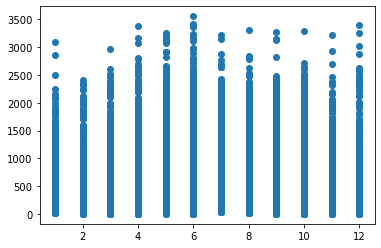

In [11]:
# bike count during different months

plt.scatter(df.loc[:,'Month'],df.loc[:,'Rented_Bike_Count'])

<AxesSubplot:xlabel='Day', ylabel='Rented_Bike_Count'>

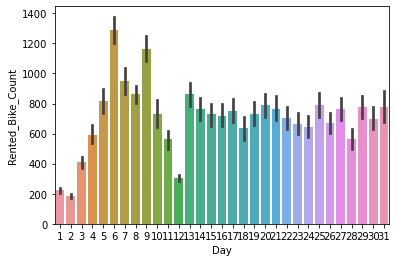

In [12]:
sb.barplot(df.loc[:,'Day'],df.loc[:,'Rented_Bike_Count'])

<AxesSubplot:xlabel='Weekend', ylabel='Rented_Bike_Count'>

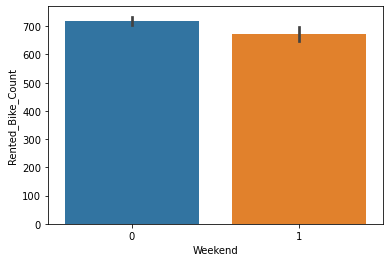

In [13]:
# bike count during weekends

sb.barplot(x = df.loc[:,'Weekend'],y = df.loc[:,'Rented_Bike_Count'])

<AxesSubplot:xlabel='Hour', ylabel='Rented_Bike_Count'>

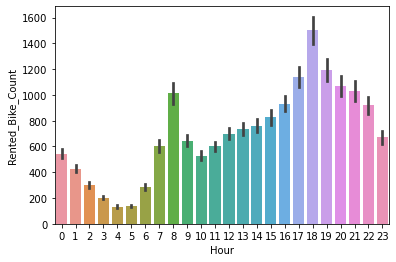

In [14]:
# rented bike counts on hourly basis

sb.barplot(df.loc[:,'Hour'],df.loc[:,'Rented_Bike_Count'])

<AxesSubplot:xlabel='Seasons', ylabel='Rented_Bike_Count'>

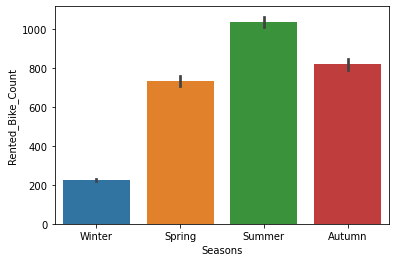

In [15]:
# bike count in seasons

sb.barplot(df.loc[:,'Seasons'],df.loc[:,'Rented_Bike_Count'])

<AxesSubplot:xlabel='Temperature', ylabel='Rented_Bike_Count'>

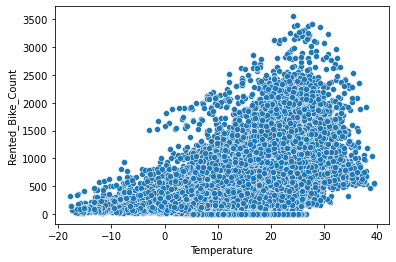

In [16]:
# temperature

sb.scatterplot(df.loc[:,'Temperature'],df.loc[:,'Rented_Bike_Count'])

<AxesSubplot:xlabel='Wind_speed', ylabel='Rented_Bike_Count'>

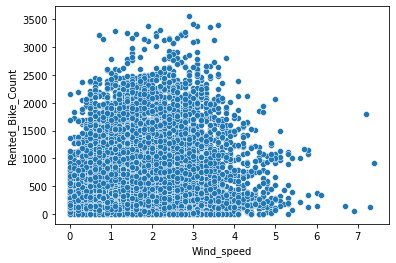

In [17]:
# wind speed

sb.scatterplot(df.loc[:,'Wind_speed'],df.loc[:,'Rented_Bike_Count'])

<AxesSubplot:xlabel='Visibility', ylabel='Rented_Bike_Count'>

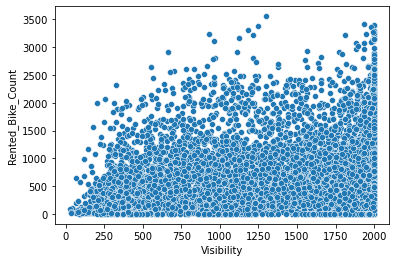

In [18]:
# visibility

sb.scatterplot(df.loc[:,'Visibility'],df.loc[:,'Rented_Bike_Count'])

<AxesSubplot:xlabel='Dew_point_temperature', ylabel='Rented_Bike_Count'>

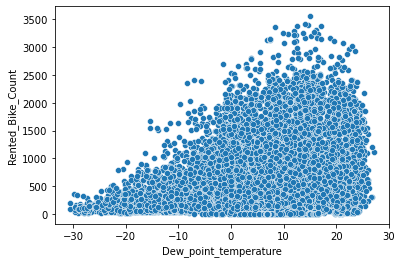

In [19]:
# dew point temperature

sb.scatterplot(df.loc[:,'Dew_point_temperature'],df.loc[:,'Rented_Bike_Count'])

<AxesSubplot:xlabel='Solar_Radiation', ylabel='Rented_Bike_Count'>

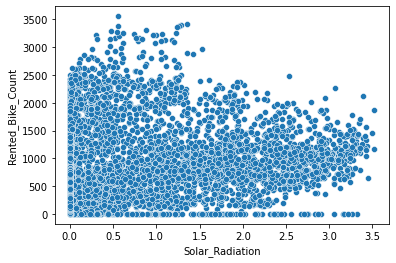

In [20]:
# Solar radiation

sb.scatterplot(df.loc[:,'Solar_Radiation'],df.loc[:,'Rented_Bike_Count'])

<AxesSubplot:xlabel='Rainfall', ylabel='Rented_Bike_Count'>

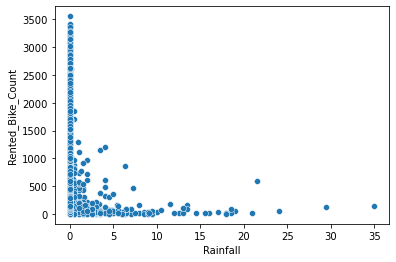

In [21]:
# Rainfall

sb.scatterplot(df.loc[:,'Rainfall'],df.loc[:,'Rented_Bike_Count'])

<AxesSubplot:xlabel='Rainfall'>

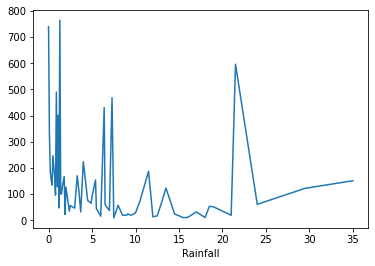

In [22]:
# Rainfall

# df['Rainfall'].plot(kind='hist')
# plt.show()

df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()

<AxesSubplot:xlabel='Snowfall'>

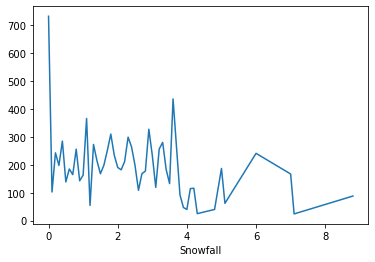

In [23]:
# Snowfall

# sb.scatterplot(df.loc[:,'Snowfall'],df.loc[:,'Rented_Bike_Count'])
df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()

<AxesSubplot:xlabel='Holiday', ylabel='Rented_Bike_Count'>

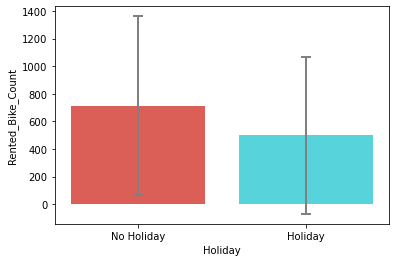

In [24]:
# Holiday

sb.barplot(x = 'Holiday', 
           y = 'Rented_Bike_Count', 
           data = df,
            palette = 'hls',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', 
            errwidth = 2,  
            ci = 'sd')


In [25]:
# check correlation on the base data

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Month,Day,Weekend
Rented_Bike_Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,0.070861,0.046849,-0.032259
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,0.000000,0.000000,-0.000000
Temperature,0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,0.049683,0.080908,-0.012972
Humidity,-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,0.047798,0.007047,-0.036750
Wind_speed,0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-0.082069,-0.061234,-0.022391
Visibility,0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,0.077888,-0.106859,0.030650
Dew_point_temperature,0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,0.065101,0.069708,-0.028966
Solar_Radiation,0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-0.030412,-0.003446,0.008271
Rainfall,-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-0.022794,0.011998,-0.014280
Snowfall,-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,0.054758,0.101435,-0.022557


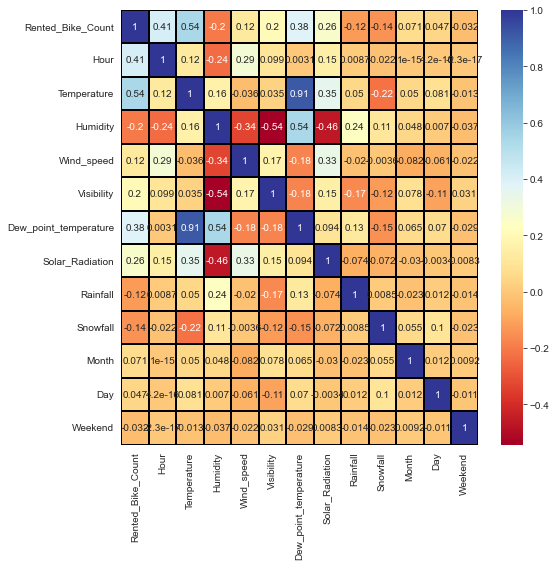

In [26]:
plt.figure(figsize=(8,8))
sb.set_style("whitegrid", {"axes.facecolor": ".0"})
plot_kws={"s": 1}
sb.heatmap(df.corr(),
            cmap='RdYlBu',
            annot=True,
            linewidths=0.2, 
            linecolor='black').set_facecolor('green')


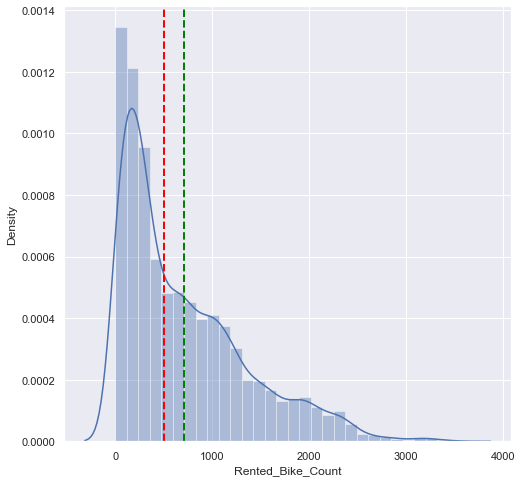

In [27]:
# Distribution of dependeant variable - rented bikes

sb.set(rc={'figure.figsize':(8,8)})
chart = sb.distplot(df['Rented_Bike_Count'], bins=30)
chart.axvline(df['Rented_Bike_Count'].mean(), color='green', linestyle='dashed', linewidth=2)
chart.axvline(df['Rented_Bike_Count'].median(), color='red', linestyle='dashed', linewidth=2)
plt.show()


# Tasks

In [28]:
# create dummy variables
df = pd.get_dummies(df, columns=['Seasons','Holiday','Functioning_Day'])
print(df.shape)
df.head(2)


# convert data to float
# df['Humidity'] = df['Humidity'].astype(float)
# df['Visibility'] = df['Humidity'].astype(float)
# df['Year'] = df['Humidity'].astype(float) # just to check the execution, later delete it
# df['Month'] = df['Humidity'].astype(float) # just to check the execution, later delete it

(8760, 21)


,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,...,Day,Weekend,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning_Day_No,Functioning_Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,12,0,0,0,0,1,0,1,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,12,0,0,0,0,1,0,1,0,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Month                  8760 non-null   int64  
 11  Day                    8760 non-null   int64  
 12  Weekend                8760 non-null   int64  
 13  Seasons_Autumn         8760 non-null   uint8  
 14  Seasons_Spring         8760 non-null   uint8  
 15  Seas

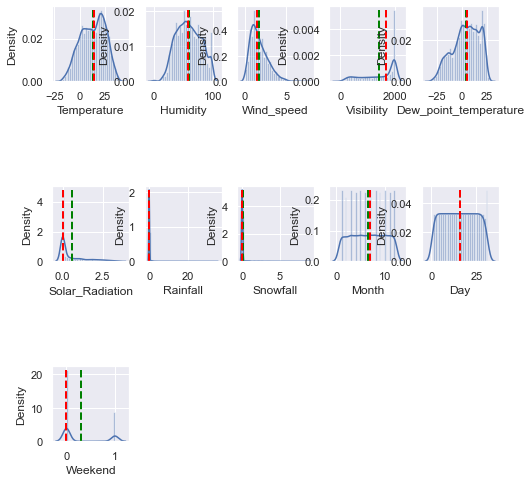

In [30]:
# Distribution of independent variables

plt.subplot(5,5,1)
sb.set(rc={'figure.figsize':(8,8)})
chart = sb.distplot(df['Temperature'], bins=30)
chart.axvline(df['Temperature'].mean(), color='green', linestyle='dashed', linewidth=2)
chart.axvline(df['Temperature'].median(), color='red', linestyle='dashed', linewidth=2)
# plt.show()

plt.subplot(5,5,2)
sb.set(rc={'figure.figsize':(8,8)})
chart = sb.distplot(df['Humidity'], bins=30)
chart.axvline(df['Humidity'].mean(), color='green', linestyle='dashed', linewidth=2)
chart.axvline(df['Humidity'].median(), color='red', linestyle='dashed', linewidth=2)
# plt.show()

plt.subplot(5,5,3)
sb.set(rc={'figure.figsize':(8,8)})
chart = sb.distplot(df['Wind_speed'], bins=30)
chart.axvline(df['Wind_speed'].mean(), color='green', linestyle='dashed', linewidth=2)
chart.axvline(df['Wind_speed'].median(), color='red', linestyle='dashed', linewidth=2)
# plt.show()

plt.subplot(5,5,4)
sb.set(rc={'figure.figsize':(8,8)})
chart = sb.distplot(df['Visibility'], bins=30)
chart.axvline(df['Visibility'].mean(), color='green', linestyle='dashed', linewidth=2)
chart.axvline(df['Visibility'].median(), color='red', linestyle='dashed', linewidth=2)
# plt.show()

plt.subplot(5,5,5)
sb.set(rc={'figure.figsize':(8,8)})
chart = sb.distplot(df['Dew_point_temperature'], bins=30)
chart.axvline(df['Dew_point_temperature'].mean(), color='green', linestyle='dashed', linewidth=2)
chart.axvline(df['Dew_point_temperature'].median(), color='red', linestyle='dashed', linewidth=2)
# plt.show()

plt.subplot(5,5,11)
sb.set(rc={'figure.figsize':(8,8)})
chart = sb.distplot(df['Solar_Radiation'], bins=30)
chart.axvline(df['Solar_Radiation'].mean(), color='green', linestyle='dashed', linewidth=2)
chart.axvline(df['Solar_Radiation'].median(), color='red', linestyle='dashed', linewidth=2)
# plt.show()

plt.subplot(5,5,12)
sb.set(rc={'figure.figsize':(8,8)})
chart = sb.distplot(df['Rainfall'], bins=30)
chart.axvline(df['Rainfall'].mean(), color='green', linestyle='dashed', linewidth=2)
chart.axvline(df['Rainfall'].median(), color='red', linestyle='dashed', linewidth=2)
# plt.show()

plt.subplot(5,5,13)
sb.set(rc={'figure.figsize':(8,8)})
chart = sb.distplot(df['Snowfall'], bins=30)
chart.axvline(df['Snowfall'].mean(), color='green', linestyle='dashed', linewidth=2)
chart.axvline(df['Snowfall'].median(), color='red', linestyle='dashed', linewidth=2)
# plt.show()

plt.subplot(5,5,14)
sb.set(rc={'figure.figsize':(8,8)})
chart = sb.distplot(df['Month'], bins=30)
chart.axvline(df['Month'].mean(), color='green', linestyle='dashed', linewidth=2)
chart.axvline(df['Month'].median(), color='red', linestyle='dashed', linewidth=2)
# plt.show()

plt.subplot(5,5,15)
sb.set(rc={'figure.figsize':(8,8)})
chart = sb.distplot(df['Day'], bins=30)
chart.axvline(df['Day'].mean(), color='green', linestyle='dashed', linewidth=2)
chart.axvline(df['Day'].median(), color='red', linestyle='dashed', linewidth=2)
# plt.show()

plt.subplot(5,5,21)
sb.set(rc={'figure.figsize':(8,8)})
chart = sb.distplot(df['Weekend'], bins=30)
chart.axvline(df['Weekend'].mean(), color='green', linestyle='dashed', linewidth=2)
chart.axvline(df['Weekend'].median(), color='red', linestyle='dashed', linewidth=2)
# plt.show()

plt.show()

In [31]:
# Intercept bias 
df['Intercept'] = 1

#Rearrange the index 'intercept'
df = df.reindex(['Intercept','Hour', 'Temperature', 'Humidity', 'Wind_speed','Visibility', 'Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall', 'Month','Day', 'Weekend', 'Seasons_Autumn', 'Seasons_Spring', 
       'Seasons_Summer','Seasons_Winter', 'Holiday_Holiday', 'Holiday_No Holiday','Functioning_Day_No', 
       'Functioning_Day_Yes','Rented_Bike_Count'], axis=1)

print(df.shape)
df.head()

(8760, 22)


,Intercept,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,...,Weekend,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning_Day_No,Functioning_Day_Yes,Rented_Bike_Count
0,1,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,1,254
1,1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,1,204
2,1,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,1,173
3,1,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,1,107
4,1,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,1,78


##### Scaling the data

In [32]:
# Scalling the data

sc = StandardScaler()
df1 = sc.fit_transform(df)
df1 = pd.DataFrame(df1)

df1.columns = df.columns

# view the data after scaling
df1.head()


,Intercept,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,...,Weekend,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning_Day_No,Functioning_Day_Yes,Rented_Bike_Count
0,0.0,-1.661325,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,...,-0.639739,-0.576296,-0.580514,-0.580514,1.748015,-0.227757,0.227757,-0.18668,0.18668,-0.698650
1,0.0,-1.516862,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,...,-0.639739,-0.576296,-0.580514,-0.580514,1.748015,-0.227757,0.227757,-0.18668,0.18668,-0.776175
2,0.0,-1.372399,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891,...,-0.639739,-0.576296,-0.580514,-0.580514,1.748015,-0.227757,0.227757,-0.18668,0.18668,-0.824240
3,0.0,-1.227936,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,...,-0.639739,-0.576296,-0.580514,-0.580514,1.748015,-0.227757,0.227757,-0.18668,0.18668,-0.926571
4,0.0,-1.083473,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891,...,-0.639739,-0.576296,-0.580514,-0.580514,1.748015,-0.227757,0.227757,-0.18668,0.18668,-0.971535


##### Task 1

In [33]:
# ========== Task 1 ==========
# Download the dataset and partition it randomly into train and test set using a good train/test split percentage.

X = df1.loc[:, ~ df1.columns.isin(["Rented_Bike_Count"])]
print(X.shape)
# X.head()

Y = df1.loc[:,"Rented_Bike_Count"]
# y.head()

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 20, random_state = 0)

print(X_train.shape)
print(type(X_train))
X_train.head()

(8760, 21)
(8740, 21)
<class 'pandas.core.frame.DataFrame'>


,Intercept,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,...,Day,Weekend,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning_Day_No,Functioning_Day_Yes
5362,0.0,-0.216695,1.156808,1.462275,-0.120540,-1.043668,1.564072,0.369392,0.311412,-0.171891,...,-0.991394,-0.639739,-0.576296,-0.580514,1.722612,-0.572078,-0.227757,0.227757,-0.18668,0.18668
234,0.0,0.939010,-0.911151,0.136227,1.230497,0.925871,-0.671827,-0.655132,-0.131800,-0.171891,...,-0.422970,-0.639739,-0.576296,-0.580514,-0.580514,1.748015,-0.227757,0.227757,-0.18668,0.18668
6342,0.0,-0.794547,0.905639,0.971146,-1.375075,0.925871,1.188869,-0.655132,-0.131800,-0.171891,...,0.713879,-0.639739,-0.576296,-0.580514,1.722612,-0.572078,-0.227757,0.227757,-0.18668,0.18668
1515,0.0,-1.227936,-1.606053,0.234452,-0.796059,-0.019442,-1.246117,-0.655132,-0.131800,-0.171891,...,-1.559818,-0.639739,-0.576296,-0.580514,-0.580514,1.748015,-0.227757,0.227757,-0.18668,0.18668
3510,0.0,-0.794547,-0.241367,0.676468,-0.892561,-0.361399,0.078577,-0.643620,-0.131800,-0.171891,...,1.168618,-0.639739,-0.576296,1.722612,-0.580514,-0.572078,-0.227757,0.227757,-0.18668,0.18668


In [34]:
print(Y_train.shape)
Y_train.head(3)

(8740,)


5362    0.064187
234    -0.766872
6342   -0.076907
Name: Rented_Bike_Count, dtype: float64

##### Normalising the data

In [35]:
# # Normalising the training data - independeant variables

# X_train['Hour'] = (X_train['Hour'] - X_train['Hour'].mean())/X_train['Hour'].std()
# X_train['Temperature'] = (X_train['Temperature'] - X_train['Temperature'].mean())/X_train['Temperature'].std()
# X_train['Humidity'] = (X_train['Humidity'] - X_train['Humidity'].mean())/X_train['Humidity'].std()
# X_train['Wind_speed'] = (X_train['Wind_speed'] - X_train['Wind_speed'].mean())/X_train['Wind_speed'].std()
# X_train['Visibility'] = (X_train['Visibility'] - X_train['Visibility'].mean())/X_train['Visibility'].std()
# X_train['Dew_point_temperature'] = (X_train['Dew_point_temperature'] - X_train['Dew_point_temperature'].mean())/X_train['Dew_point_temperature'].std()
# X_train['Solar_Radiation'] = (X_train['Solar_Radiation'] - X_train['Solar_Radiation'].mean())/X_train['Solar_Radiation'].std()
# X_train['Rainfall'] = (X_train['Rainfall'] - X_train['Rainfall'].mean())/X_train['Rainfall'].std()
# X_train['Snowfall'] = (X_train['Snowfall'] - X_train['Snowfall'].mean())/X_train['Snowfall'].std()


# X_train.head()

In [36]:
# # Normalising the training data - dependeant variables

# Y_train = (Y_train - Y_train.mean())/Y_train.std()
# Y_train.head()

In [37]:
# # Normalising the testing data - independeant variables

# X_test['Hour'] = (X_test['Hour'] - X_train['Hour'].mean())/X_train['Hour'].std()
# X_test['Temperature'] = (X_test['Temperature'] - X_train['Temperature'].mean())/X_train['Temperature'].std()
# X_test['Humidity'] = (X_test['Humidity'] - X_train['Humidity'].mean())/X_train['Humidity'].std()
# X_test['Wind_speed'] = (X_test['Wind_speed'] - X_train['Wind_speed'].mean())/X_train['Wind_speed'].std()
# X_test['Visibility'] = (X_test['Visibility'] - X_train['Visibility'].mean())/X_train['Visibility'].std()
# X_test['Dew_point_temperature'] = (X_test['Dew_point_temperature'] - X_train['Dew_point_temperature'].mean())/X_train['Dew_point_temperature'].std()
# X_test['Solar_Radiation'] = (X_test['Solar_Radiation'] - X_train['Solar_Radiation'].mean())/X_train['Solar_Radiation'].std()
# X_test['Rainfall'] = (X_test['Rainfall'] - X_train['Rainfall'].mean())/X_train['Rainfall'].std()
# X_test['Snowfall'] = (X_test['Snowfall'] - X_train['Snowfall'].mean())/X_train['Snowfall'].std()

# X_test.head()

In [38]:
# Y_test = (Y_test - Y_train.mean())/Y_train.std()
# Y_test.head()

##### Task2

In [39]:
# ========== Task 2 ==========
# Design a linear regression model to model rented bike count. Include your regression model equation in the report.

# base_lr_model = "B1*(Hour) + B2*(Temperature) + B3*(Humidity) + B4*(Wind_speed) + B5*(Visibility) + B6*(Dew_point_temperature) + B7*(Solar_Radiation) + B8*(Rainfall) + B9*(Snowfall) + B10*(Seasons) + B11*(Holiday) + B12*(Functioning_Day) + B13*(Year) + B14*(Month) + B15*(Season) + B0"  
# base_lr_model

base_lr_var = ['Intercept','Hour', 'Temperature', 'Humidity', 'Wind_speed','Visibility', 'Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall', 'Month','Day', 'Weekend', 'Seasons_Autumn', 'Seasons_Spring', 
       'Seasons_Summer','Seasons_Winter', 'Holiday_Holiday', 'Holiday_No Holiday','Functioning_Day_No', 
       'Functioning_Day_Yes']

base_lr_model = ['B0+ B1* Hour + B2*Temperature + B3*Humidity + B4*Wind_speed + B5*Visibility + B6*Dew_point_temperature + B7*Solar_Radiation + B8*Rainfall + B9*Snowfall + B10*Month + B11*Day + B12*Weekend + B13*Seasons_Autumn + B14* Seasons_Spring +B15* Seasons_Summer + B16* Seasons_Winter + B17* Holiday_Holiday + B18* Holiday_No Holiday +B19* Functioning_Day_No + B20* Functioning_Day_Yes']

print("Model Variables are \n", base_lr_var)
print("\n Model Equation is \n", base_lr_model)

Model Variables are 
 ['Intercept', 'Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Month', 'Day', 'Weekend', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Holiday_Holiday', 'Holiday_No Holiday', 'Functioning_Day_No', 'Functioning_Day_Yes']

 Model Equation is 
 ['B0+ B1* Hour + B2*Temperature + B3*Humidity + B4*Wind_speed + B5*Visibility + B6*Dew_point_temperature + B7*Solar_Radiation + B8*Rainfall + B9*Snowfall + B10*Month + B11*Day + B12*Weekend + B13*Seasons_Autumn + B14* Seasons_Spring +B15* Seasons_Summer + B16* Seasons_Winter + B17* Holiday_Holiday + B18* Holiday_No Holiday +B19* Functioning_Day_No + B20* Functioning_Day_Yes']


##### Task 3

In [40]:
# ========== Task 3 ==========
# Implement the gradient descent algorithm with batch update rule. Use the same cost function as in the 
# class (sum of squared error). Report your initial parameter values.

def cost_function(x,y,beta):
    # cost_function(X,y,beta):cost of using beta as parameter for LR to fit the data points in X and y
    m = len(x)
    J = np.sum((x.dot(beta)-y)**2)/(2*m)
    return J

def gradient_descent_function(X,y,beta, learning_rate, iterations):
    # This function updates beta by taking the iterations gradient steps with learning rate
    cost_old = [0] * iterations
    m = len(X)
    
    for i in range(iterations):
        y_hat = X.dot(beta)
        remaining = y_hat - y
        gradient = X.T.dot(remaining)/m
        beta = beta - (learning_rate * gradient)
        cost = cost_function(X,y,beta)
        cost_old[i] = cost
    return beta, cost_old


In [41]:
# Train Data, define initial beta
beta = np.zeros((X_train.shape[1]))
beta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [42]:
#beta = np.array([0,0])
iterations = 2000 # epoch
learning_rate = 0.05 # learning rate


(beta_value_new, cost_history) = gradient_descent_function(X_train, Y_train, beta, learning_rate, iterations)
print("Beta coefficients are: \n", beta_value_new)
print("Cost functions: \n", cost_history)

Beta coefficients are: 
 Intercept                0.000000
Hour                     0.294173
Temperature              0.337593
Humidity                -0.330860
Wind_speed               0.030782
Visibility               0.007160
Dew_point_temperature    0.189696
Solar_Radiation         -0.107950
Rainfall                -0.102425
Snowfall                 0.022269
Month                    0.016449
Day                     -0.015449
Weekend                 -0.027911
Seasons_Autumn           0.106379
Seasons_Spring           0.020983
Seasons_Summer           0.002550
Seasons_Winter          -0.130480
Holiday_Holiday         -0.019640
Holiday_No Holiday       0.019640
Functioning_Day_No      -0.130399
Functioning_Day_Yes      0.130399
dtype: float64
Cost functions: 
 [0.44507600545023634, 0.4028360899644396, 0.3703654062986351, 0.34518609674283846, 0.32548572561879674, 0.30993133321817684, 0.29753698374142096, 0.28756908386101493, 0.27947844326040544, 0.2728513254714164, 0.2673740281692664, 

In [43]:
beta_value_new

Intercept                0.000000
Hour                     0.294173
Temperature              0.337593
Humidity                -0.330860
Wind_speed               0.030782
Visibility               0.007160
Dew_point_temperature    0.189696
Solar_Radiation         -0.107950
Rainfall                -0.102425
Snowfall                 0.022269
Month                    0.016449
Day                     -0.015449
Weekend                 -0.027911
Seasons_Autumn           0.106379
Seasons_Spring           0.020983
Seasons_Summer           0.002550
Seasons_Winter          -0.130480
Holiday_Holiday         -0.019640
Holiday_No Holiday       0.019640
Functioning_Day_No      -0.130399
Functioning_Day_Yes      0.130399
dtype: float64

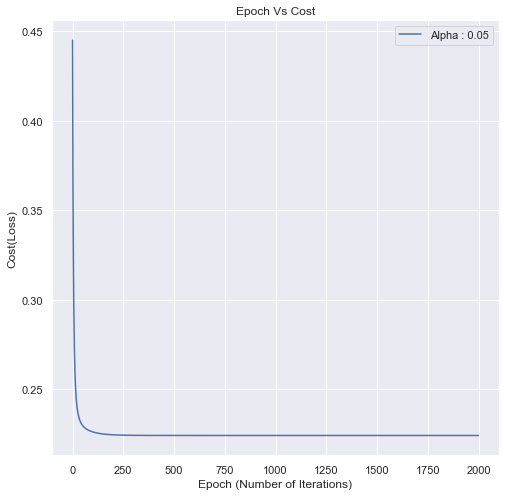

Epoch = 2000
Learning Rate(Alpha) = 0.05
Lowest cost = 0.22420995230275031
-------------------------------------------------------------
Cost after 2000 iterations = 0.22420995230275031


In [44]:
# Plot cost function

plt.plot(cost_history)
plt.xlabel("Epoch (Number of Iterations)")
plt.ylabel("Cost(Loss)")
plt.title("Epoch Vs Cost")
plt.legend([f'Alpha : {learning_rate}'])
plt.show()
print(f'Epoch = {iterations}')
print(f'Learning Rate(Alpha) = {learning_rate}')
print(f'Lowest cost = {str(np.min(cost_history))}')
print('-------------------------------------------------------------')
print(f'Cost after {iterations} iterations = {str(cost_history[-1])}')


# Predict output

##### Testing the performance of the model

In [45]:
# Predict Output for Test Data
y_predicted= np.dot(X_test, beta_value_new)
print("Predicted Y:-")
print(y_predicted)

# EVALUATE TRAINING PERFORMANCE

# Evaluation Metrics - Calculation of Mean Absolute Error(MAE), 
# Mean Squared Error (MSE), Root Mean Square Error(RMSE), R2 Score for Training

y_pred_train = np.dot(X_train, beta_value_new)

print("------Training Performance Evaluation-------")
print("Mean Absolute Error(MAE):",mean_absolute_error(Y_train,y_pred_train))
print("Mean Squared Error(MSE):",mean_squared_error(Y_train,y_pred_train))
print("Root Mean Square Error(RMSE):",np.sqrt(mean_squared_error(Y_train,y_pred_train)))
print("R2:",r2_score(Y_train,y_pred_train))

# EVALUATE TESTING PERFORMANCE

# Evaluation Metrics - Calculation of Mean Absolute Error(MAE), 
# Mean Squared Error (MSE), Root Mean Square Error(RMSE), R2 Score for Testing
print("------Testing Performance Evaluation-------")
print("Mean Absolute Error (MAE):",mean_absolute_error(Y_test,y_predicted))
print("Mean Square Error (MSE):",mean_squared_error(Y_test,y_predicted))
print("Root Mean Square Error(RMSE):",np.sqrt(mean_squared_error(Y_test,y_predicted)))
print("R2:",r2_score(Y_test,y_predicted))


Predicted Y:-
[-0.51164284  0.05878336 -0.26661313 -0.46000133  1.01112641 -0.07672483
  0.31393258 -0.33180621  1.18103101 -1.16387409  0.14212523 -0.09543359
 -0.81588771 -1.04821634 -0.26664363  0.66015109  0.00883989 -1.20347712
 -0.32026909  0.74634331]
------Training Performance Evaluation-------
Mean Absolute Error(MAE): 0.5006361995387467
Mean Squared Error(MSE): 0.44841990460550063
Root Mean Square Error(RMSE): 0.669641624009067
R2: 0.5520189507552165
------Testing Performance Evaluation-------
Mean Absolute Error (MAE): 0.5585581725682806
Mean Square Error (MSE): 0.43334314828963405
Root Mean Square Error(RMSE): 0.658288043556644
R2: -0.1578655437690586


# Experiments

##### Experiment 1

In [46]:
# Experiment 1
# Experiment with various parameters for linear regression (e.g. learning rate ∝) and report on your findings as how 
# the error varies for train and test sets with varying these parameters. Plot the results. Report the best values of 
# the parameters.

# ============================ using loop =================================
iterations = 3000
lr_experiment = [0.1, 0.01, 0.05, 0.09, 0.005, 0.001]

beta_df = pd.DataFrame()
cost_df = pd.DataFrame()
attempt = 1

for lr in lr_experiment:
    print("Attempt:",attempt,", learning rate(alpha):", lr, ", Epoch (Iterations):",iterations)
    (beta_value_updated, cost_history_updated) = gradient_descent_function(X_train, Y_train, beta, lr, iterations)
    beta_df[attempt] = beta_value_updated.to_frame()
    cost_df[attempt] = cost_history_updated

    attempt += 1


Attempt: 1 , learning rate(alpha): 0.1 , Epoch (Iterations): 3000
Attempt: 2 , learning rate(alpha): 0.01 , Epoch (Iterations): 3000
Attempt: 3 , learning rate(alpha): 0.05 , Epoch (Iterations): 3000
Attempt: 4 , learning rate(alpha): 0.09 , Epoch (Iterations): 3000
Attempt: 5 , learning rate(alpha): 0.005 , Epoch (Iterations): 3000
Attempt: 6 , learning rate(alpha): 0.001 , Epoch (Iterations): 3000


In [47]:
plt.savefig('asdsadsad.png', facecolor='w')

<Figure size 576x576 with 0 Axes>

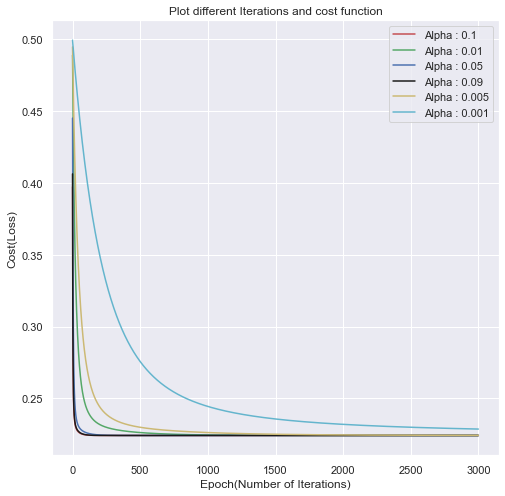

In [48]:
# Plot cost function and Iteration graph

plt.plot(cost_df[1], color = 'r', label=lr_experiment[0]) # red line
plt.plot(cost_df[2], color = 'g', label=lr_experiment[1]) # green line
plt.plot(cost_df[3], color = 'b', label=lr_experiment[2]) # blue line
plt.plot(cost_df[4], color = 'k', label=lr_experiment[3]) # black line
plt.plot(cost_df[5], color = 'y', label=lr_experiment[4]) # yellow line
plt.plot(cost_df[6], color = 'c', label=lr_experiment[5]) # cyan line


plt.xlabel("Epoch(Number of Iterations)")
plt.ylabel("Cost(Loss)")
plt.title("Plot different Iterations and cost function")

plt.legend([f'Alpha : {lr_experiment[0]}',
            f'Alpha : {lr_experiment[1]}',
            f'Alpha : {lr_experiment[2]}',
            f'Alpha : {lr_experiment[3]}',
            f'Alpha : {lr_experiment[4]}',
            f'Alpha : {lr_experiment[5]}'])
plt.show()

# print(f'Epoch = {iterations}')
# print(f'Learning Rate(Alpha) = {learning_rate}')
# print(f'Lowest cost = {str(np.min(cost_history))}')
# print('-------------------------------------------------------------')
# print(f'Cost after {iterations} iterations = {str(cost_history[-1])}')



In [49]:
cost_df.head()

,1,2,3,4,5,6
0,0.397282,0.488798,0.445076,0.406231,0.494606,0.499307
1,0.339146,0.477698,0.402836,0.349675,0.488872,0.498130
2,0.304842,0.467158,0.370365,0.314522,0.483284,0.496960
3,0.283624,0.457146,0.345186,0.291869,0.477838,0.495795
4,0.269883,0.447635,0.325486,0.276738,0.472530,0.494636


In [50]:
beta_df

,1,2,3,4,5,6
Intercept,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Hour,0.294246,0.294577,0.294197,0.294239,0.298793,0.306688
Temperature,0.325557,0.343344,0.333506,0.326749,0.330336,0.244481
Humidity,-0.336311,-0.326244,-0.332711,-0.335771,-0.312048,-0.194315
Wind_speed,0.030830,0.030631,0.030799,0.030825,0.029247,0.028548
Visibility,0.007040,0.007558,0.007119,0.007052,0.012541,0.066373
Dew_point_temperature,0.203554,0.179958,0.194402,0.202183,0.169664,0.135505
Solar_Radiation,-0.107529,-0.107281,-0.107807,-0.107571,-0.097504,-0.007340
Rainfall,-0.102266,-0.102637,-0.102371,-0.102282,-0.103839,-0.106610
Snowfall,0.022365,0.022056,0.022302,0.022356,0.020239,-0.004029


##### Experiment 2

In [51]:
# Experiment 2
# Experiment with various thresholds for convergence for linear and regression. Plot error results for train and test 
# sets as a function of threshold and describe how varying the threshold affects error. Pick your best threshold and 
# plot train and test error (in one figure) as a function of number of gradient descent iterations.


# (Jn - Jn+1) / Jn * 100
train_errors = []
test_errors = []

In [52]:
def gradient_descent_thresholds(beta, X, y, alpha, threshold):
    costs = []
    iterations = 0
    
    while True:
        iterations += 1
        y_hat = X.dot(beta)
        error = y_hat - y
        grad = X.T.dot(error)/len(y)
        beta = beta - (alpha * grad)
        costs.append(cost_function(X,y,beta))
        if len(costs) > 1:
            delta_cost_percent = ((costs[-2] - costs[-1]) / costs[-2]) * 100
            if delta_cost_percent <= threshold:
                break
    return beta, iterations


In [53]:
np.sum((X_train.dot(beta_value_new) - Y_train) ** 2) / (2 * len(Y_train))


0.22420995230275031

In [54]:
# run for mutiple threshold
threshold = 0.0001
beta_check, itr = gradient_descent_thresholds(beta_value_new, X_train, Y_train, 0.01, threshold)
mse_train = cost_function(X_train, Y_train, beta_check)
mse_test = cost_function(X_test, Y_test, beta_check)
print("Threshold: {}\nIterations: {}\nTraining Error: {}\nTesting Error: {}".format(threshold, itr, mse_train, mse_test))
train_errors.append(mse_train)
test_errors.append(mse_test)

Threshold: 0.0001
Iterations: 2
Training Error: 0.22420995188071993
Testing Error: 0.21667158708953513


In [55]:
threshold = 0.005
beta_check, itr = gradient_descent_thresholds(beta_value_new, X_train, Y_train, 0.01, threshold)
mse_train = cost_function(X_train, Y_train, beta_check)
mse_test = cost_function(X_test, Y_test, beta_check)
print("Threshold: {}\nIterations: {}\nTraining Error: {}\nTesting Error: {}".format(threshold, itr, mse_train, mse_test))
train_errors.append(mse_train)
test_errors.append(mse_test)

Threshold: 0.005
Iterations: 2
Training Error: 0.22420995188071993
Testing Error: 0.21667158708953513


In [56]:
threshold = 0.001
beta_check, itr = gradient_descent_thresholds(beta_value_new, X_train, Y_train, 0.01, threshold)
mse_train = cost_function(X_train, Y_train, beta_check)
mse_test = cost_function(X_test, Y_test, beta_check)
print("Threshold: {}\nIterations: {}\nTraining Error: {}\nTesting Error: {}".format(threshold, itr, mse_train, mse_test))
train_errors.append(mse_train)
test_errors.append(mse_test)


Threshold: 0.001
Iterations: 2
Training Error: 0.22420995188071993
Testing Error: 0.21667158708953513


In [57]:
threshold = 0.05
beta_check, itr = gradient_descent_thresholds(beta_value_new, X_train, Y_train, 0.01, threshold)
mse_train = cost_function(X_train, Y_train, beta_check)
mse_test = cost_function(X_test, Y_test, beta_check)
print("Threshold: {}\nIterations: {}\nTraining Error: {}\nTesting Error: {}".format(threshold, itr, mse_train, mse_test))
train_errors.append(mse_train)
test_errors.append(mse_test)


Threshold: 0.05
Iterations: 2
Training Error: 0.22420995188071993
Testing Error: 0.21667158708953513


In [58]:
threshold = 0.01
beta_check, itr = gradient_descent_thresholds(beta_value_new, X_train, Y_train, 0.01, threshold)
mse_train = cost_function(X_train, Y_train, beta_check)
mse_test = cost_function(X_test, Y_test, beta_check)
print("Threshold: {}\nIterations: {}\nTraining Error: {}\nTesting Error: {}".format(threshold, itr, mse_train, mse_test))
train_errors.append(mse_train)
test_errors.append(mse_test)


Threshold: 0.01
Iterations: 2
Training Error: 0.22420995188071993
Testing Error: 0.21667158708953513


In [59]:
threshold = 0.1
beta_check, itr = gradient_descent_thresholds(beta_value_new, X_train, Y_train, 0.01, threshold)
mse_train = cost_function(X_train, Y_train, beta_check)
mse_test = cost_function(X_test, Y_test, beta_check)
print("Threshold: {}\nIterations: {}\nTraining Error: {}\nTesting Error: {}".format(threshold, itr, mse_train, mse_test))
train_errors.append(mse_train)
test_errors.append(mse_test)


Threshold: 0.1
Iterations: 2
Training Error: 0.22420995188071993
Testing Error: 0.21667158708953513


In [60]:
threshold = 1
beta_check, itr = gradient_descent_thresholds(beta_value_new, X_train, Y_train, 0.01, threshold)
mse_train = cost_function(X_train, Y_train, beta_check)
mse_test = cost_function(X_test, Y_test, beta_check)
print("Threshold: {}\nIterations: {}\nTraining Error: {}\nTesting Error: {}".format(threshold, itr, mse_train, mse_test))
train_errors.append(mse_train)
test_errors.append(mse_test)


Threshold: 1
Iterations: 2
Training Error: 0.22420995188071993
Testing Error: 0.21667158708953513


In [61]:
threshold = 10
beta_check, itr = gradient_descent_thresholds(beta_value_new, X_train, Y_train, 0.01, threshold)
mse_train = cost_function(X_train, Y_train, beta_check)
mse_test = cost_function(X_test, Y_test, beta_check)
print("Threshold: {}\nIterations: {}\nTraining Error: {}\nTesting Error: {}".format(threshold, itr, mse_train, mse_test))
train_errors.append(mse_train)
test_errors.append(mse_test)

Threshold: 10
Iterations: 2
Training Error: 0.22420995188071993
Testing Error: 0.21667158708953513


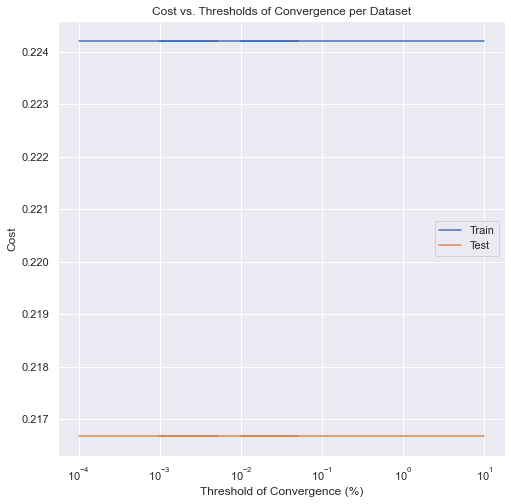

In [62]:
threshold_list = [0.0001,0.005, 0.001, 0.05, 0.01, 0.1, 1, 10]
plt.plot(threshold_list, train_errors, label = "Train")
plt.plot(threshold_list, test_errors, label = "Test")
plt.xscale('log')
plt.xlabel("Threshold of Convergence (%)")
plt.ylabel("Cost")
plt.title("Cost vs. Thresholds of Convergence per Dataset")
plt.legend()
plt.show()

In [63]:
train_errors

[0.22420995188071993,
 0.22420995188071993,
 0.22420995188071993,
 0.22420995188071993,
 0.22420995188071993,
 0.22420995188071993,
 0.22420995188071993,
 0.22420995188071993]

In [64]:
# the error needs to converge, but it is not converging

In [65]:
test_errors

[0.21667158708953513,
 0.21667158708953513,
 0.21667158708953513,
 0.21667158708953513,
 0.21667158708953513,
 0.21667158708953513,
 0.21667158708953513,
 0.21667158708953513]

##### Experiment 3

In [66]:
# Experiment 3
# Pick eight features randomly and retrain your model only on these eight features. Compare train and test error results 
# for the case of using your original set of all features and eight random features. Report the eight randomly selected 
# features.


import random

random.seed(100)
# fix_intercept = [0]
random_features = random.sample(range(1, 21), 8)
random_features.insert(0,0)
print(random_features)

X_train_exp3 = X_train.iloc[:,random_features]
X_train_exp3.head()


[0, 5, 15, 19, 6, 13, 12, 17, 7]


,Intercept,Visibility,Seasons_Summer,Functioning_Day_No,Dew_point_temperature,Seasons_Autumn,Weekend,Holiday_Holiday,Solar_Radiation
5362,0.0,-1.043668,1.722612,-0.18668,1.564072,-0.576296,-0.639739,-0.227757,0.369392
234,0.0,0.925871,-0.580514,-0.18668,-0.671827,-0.576296,-0.639739,-0.227757,-0.655132
6342,0.0,0.925871,1.722612,-0.18668,1.188869,-0.576296,-0.639739,-0.227757,-0.655132
1515,0.0,-0.019442,-0.580514,-0.18668,-1.246117,-0.576296,-0.639739,-0.227757,-0.655132
3510,0.0,-0.361399,-0.580514,-0.18668,0.078577,-0.576296,-0.639739,-0.227757,-0.643620


In [67]:
X_test_exp3 = X_test.iloc[:,random_features]
X_test_exp3.head()

,Intercept,Visibility,Seasons_Summer,Functioning_Day_No,Dew_point_temperature,Seasons_Autumn,Weekend,Holiday_Holiday,Solar_Radiation
4059,0.0,0.925871,-0.580514,-0.18668,0.147492,-0.576296,1.563137,-0.227757,-0.655132
6914,0.0,0.925871,-0.580514,-0.18668,1.035726,1.735220,1.563137,-0.227757,-0.655132
233,0.0,-0.617866,-0.580514,-0.18668,-0.488055,-0.576296,-0.639739,-0.227757,-0.620597
982,0.0,0.925871,-0.580514,-0.18668,-1.682576,-0.576296,-0.639739,-0.227757,-0.655132
5967,0.0,0.018371,1.722612,-0.18668,1.533443,-0.576296,-0.639739,-0.227757,1.624145


In [68]:
# ============================ Re-training the model =================================

# Train Data
beta = np.zeros((X_train_exp3.shape[1]))

iterations_exp3 = 2000
# lr_experiment3 = [0.1, 0.01, 0.05, 0.09]

lr_experiment3 = [0.05]

beta_df_exp3 = pd.DataFrame()
beta_df_exp3 = pd.DataFrame()
attempt_exp3 = 1

(beta_value_exp3, cost_history_exp3) = gradient_descent_function(X_train_exp3, Y_train, beta, 0.05, 2000)
beta_value_exp3

# try using for loop
# for lr in lr_experiment3:
#     print("Experiment 3 - Attempt:",attempt_exp3," learning rate(alpha):", lr, "Epoch (Iterations):",iterations_exp3)
#     (beta_value_exp3, cost_history_exp3) = gradient_descent_function(X_train_exp3, Y_train, beta, lr, iterations_exp3)
#     beta_df_exp3[attempt_exp3] = beta_value_exp3.to_frame()
#     beta_df_exp3[attempt_exp3] = cost_history_exp3
    
# #     print("Beta coefficients are: \n", beta_value_new)
# #     print("Cost functions: \n", cost_history)  
# #     print("beta_df: ", beta_df)

#     attempt_exp3 += 1


Intercept                0.000000
Visibility               0.236483
Seasons_Summer           0.002416
Functioning_Day_No      -0.262453
Dew_point_temperature    0.404869
Seasons_Autumn           0.123852
Weekend                 -0.024274
Holiday_Holiday         -0.046724
Solar_Radiation          0.193325
dtype: float64

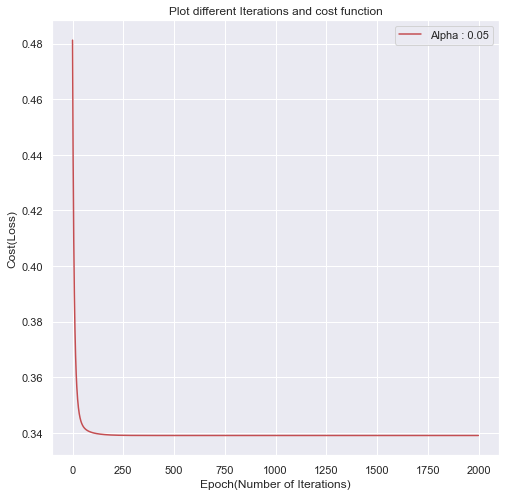

In [69]:
# Plot cost function and Iteration graph

plt.plot(cost_history_exp3, color = 'r', label=2000) # red line
# plt.plot(cost_df[2], color = 'g', label=lr_experiment[1]) # green line
# plt.plot(cost_df[3], color = 'b', label=lr_experiment[2]) # blue line
# plt.plot(cost_df[4], color = 'k', label=lr_experiment[3]) # black line
# plt.plot(cost_df[5], color = 'y', label=lr_experiment[4]) # yellow line
# plt.plot(cost_df[6], color = 'c', label=lr_experiment[5]) # cyan line


plt.xlabel("Epoch(Number of Iterations)")
plt.ylabel("Cost(Loss)")
plt.title("Plot different Iterations and cost function")

plt.legend(['Alpha : 0.05'])
plt.show()

# print(f'Epoch = {iterations}')
# print(f'Learning Rate(Alpha) = {learning_rate}')
# print(f'Lowest cost = {str(np.min(cost_history))}')
# print('-------------------------------------------------------------')
# print(f'Cost after {iterations} iterations = {str(cost_history[-1])}')



In [70]:
# Evaluation Metrics - Calculation of Mean Absolute Error(MAE), 
# Mean Squared Error (MSE), Root Mean Square Error(RMSE), R2 Score for Training

# Predict Output for Test Data
y_predicted_exp3 = np.dot(X_test_exp3, beta_value_exp3)

y_pred_train_exp3 = np.dot(X_train_exp3, beta_value_exp3)

print("------Training Performance Evaluation-------")
print("Mean Absolute Error(MAE):",mean_absolute_error(Y_train,y_pred_train_exp3))
print("Mean Squared Error(MSE):",mean_squared_error(Y_train,y_pred_train_exp3))
print("Root Mean Square Error(RMSE):",np.sqrt(mean_squared_error(Y_train,y_pred_train_exp3)))
print("R2:",r2_score(Y_train,y_pred_train_exp3))

# Evaluation Metrics - Calculation of Mean Absolute Error(MAE), 
# Mean Squared Error (MSE), Root Mean Square Error(RMSE), R2 Score for Testing
print("------Testing Performance Evaluation-------")
print("Mean Absolute Error (MAE):",mean_absolute_error(Y_test,y_predicted))
print("Mean Square Error (MSE):",mean_squared_error(Y_test,y_predicted))
print("Root Mean Square Error(RMSE):",np.sqrt(mean_squared_error(Y_test,y_predicted)))
print("R2:",r2_score(Y_test,y_predicted))



------Training Performance Evaluation-------
Mean Absolute Error(MAE): 0.6019644153535502
Mean Squared Error(MSE): 0.6779819801362428
Root Mean Square Error(RMSE): 0.8233966116861563
R2: 0.3226815408702881
------Testing Performance Evaluation-------
Mean Absolute Error (MAE): 0.5585581725682806
Mean Square Error (MSE): 0.43334314828963405
Root Mean Square Error(RMSE): 0.658288043556644
R2: -0.1578655437690586


##### Experiment 4

In [71]:
# Experiment 4
# Now pick eight features that you think are best suited to predict the output, and retrain your model using these 
# eight features. Compare to the case of using your original set of features and to the random features case. 
# Did your choice of features provide better results than picking random features? Why? 
# Did your choice of features provide better results than using all features? Why?

corr_scale = df1.corr()
corr_scale.style.background_gradient(cmap='coolwarm')


,Intercept,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Month,Day,Weekend,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning_Day_No,Functioning_Day_Yes,Rented_Bike_Count
Intercept,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Hour,nan,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.005439,0.005439,0.410257
Temperature,nan,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,0.049683,0.080908,-0.012972,0.059728,0.007960,0.665846,-0.738720,-0.055931,0.055931,0.050170,-0.050170,0.538558
Humidity,nan,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,0.047798,0.007047,-0.036750,0.028367,0.015694,0.192595,-0.238295,-0.050278,0.050278,0.020800,-0.020800,-0.199780
Wind_speed,nan,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-0.082069,-0.061234,-0.022391,-0.128009,0.083855,-0.064698,0.109186,0.023017,-0.023017,-0.005037,0.005037,0.121108
Visibility,nan,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,0.077888,-0.106859,0.030650,0.117413,-0.187498,0.061958,0.008616,0.031773,-0.031773,0.026000,-0.026000,0.199280
Dew_point_temperature,nan,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,0.065101,0.069708,-0.028966,0.062878,0.002056,0.652378,-0.722366,-0.066759,0.066759,0.052837,-0.052837,0.379788
Solar_Radiation,nan,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-0.030412,-0.003446,0.008271,-0.031374,0.079974,0.128402,-0.178420,-0.005077,0.005077,0.007665,-0.007665,0.261837
Rainfall,nan,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-0.022794,0.011998,-0.014280,-0.013247,0.017595,0.053928,-0.058755,-0.014269,0.014269,-0.002055,0.002055,-0.123074
Snowfall,nan,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,0.054758,0.101435,-0.022557,-0.024742,-0.099785,-0.099785,0.225875,-0.012591,0.012591,-0.032089,0.032089,-0.141804


In [72]:
features_exp4 = ['Intercept','Hour','Dew_point_temperature','Seasons_Winter','Solar_Radiation', 'Functioning_Day_Yes','Visibility','Wind_speed','Seasons_Autumn']
features_exp4

['Intercept',
 'Hour',
 'Dew_point_temperature',
 'Seasons_Winter',
 'Solar_Radiation',
 'Functioning_Day_Yes',
 'Visibility',
 'Wind_speed',
 'Seasons_Autumn']

In [73]:
# Reasons for the variable selection

# Hour - Not correlated with any of the variable, I am trying to check how does is show the behaviour of rented bike counts
# Dew_point_temperature - High correlation with temperature, humidity, summer 
# Seasons_Winter - high negative correlation with rented bike counts and dew point temperature
# Solar_Radiation - good relation with rented bike counts
# Functioning_Day_Yes - good relation with rented bike counts (also based on EDA)
# Visibility - good relation with rented bike counts (also based on EDA)
# Wind_speed - good relation with rented bike counts (also based on EDA)
# Seasons_Autumn - good relation with rented bike counts (also based on EDA)

In [74]:
# subset the data

X_train_exp4 = X_train.loc[:,features_exp4]
X_train_exp4.head()

,Intercept,Hour,Dew_point_temperature,Seasons_Winter,Solar_Radiation,Functioning_Day_Yes,Visibility,Wind_speed,Seasons_Autumn
5362,0.0,-0.216695,1.564072,-0.572078,0.369392,0.18668,-1.043668,-0.120540,-0.576296
234,0.0,0.939010,-0.671827,1.748015,-0.655132,0.18668,0.925871,1.230497,-0.576296
6342,0.0,-0.794547,1.188869,-0.572078,-0.655132,0.18668,0.925871,-1.375075,-0.576296
1515,0.0,-1.227936,-1.246117,1.748015,-0.655132,0.18668,-0.019442,-0.796059,-0.576296
3510,0.0,-0.794547,0.078577,-0.572078,-0.643620,0.18668,-0.361399,-0.892561,-0.576296


In [75]:
X_test_exp4 = X_test.loc[:,features_exp4]
X_test_exp4.head()

,Intercept,Hour,Dew_point_temperature,Seasons_Winter,Solar_Radiation,Functioning_Day_Yes,Visibility,Wind_speed,Seasons_Autumn
4059,0.0,-1.227936,0.147492,-0.572078,-0.655132,0.18668,0.925871,-0.410048,-0.576296
6914,0.0,-1.372399,1.035726,-0.572078,-0.655132,0.18668,0.925871,-0.699556,1.735220
233,0.0,0.794547,-0.488055,1.748015,-0.620597,0.18668,-0.617866,2.485032,-0.576296
982,0.0,1.516862,-1.682576,1.748015,-0.655132,0.18668,0.925871,1.037492,-0.576296
5967,0.0,0.505621,1.533443,-0.572078,1.624145,0.18668,0.018371,1.809513,-0.576296


In [76]:
# ============================ Re-training the model =================================

# Train Data
beta = np.zeros((X_train_exp4.shape[1]))

iterations_exp4 = 2000
# lr_experiment3 = [0.1, 0.01, 0.05, 0.09]

lr_experiment4 = [0.05]

beta_df_exp4 = pd.DataFrame()
beta_df_exp4 = pd.DataFrame()
attempt_exp4 = 1

(beta_value_exp4, cost_history_exp4) = gradient_descent_function(X_train_exp4, Y_train, beta, 0.05, 2000)
beta_value_exp4


# for lr in lr_experiment3:
#     print("Experiment 3 - Attempt:",attempt_exp3," learning rate(alpha):", lr, "Epoch (Iterations):",iterations_exp3)
#     (beta_value_exp3, cost_history_exp3) = gradient_descent_function(X_train_exp3, Y_train, beta, lr, iterations_exp3)
#     beta_df_exp3[attempt_exp3] = beta_value_exp3.to_frame()
#     beta_df_exp3[attempt_exp3] = cost_history_exp3
    
# #     print("Beta coefficients are: \n", beta_value_new)
# #     print("Cost functions: \n", cost_history)  
# #     print("beta_df: ", beta_df)

#     attempt_exp3 += 1


Intercept                0.000000
Hour                     0.367111
Dew_point_temperature    0.237289
Seasons_Winter          -0.247644
Solar_Radiation          0.109458
Functioning_Day_Yes      0.261107
Visibility               0.186883
Wind_speed               0.023787
Seasons_Autumn           0.056815
dtype: float64

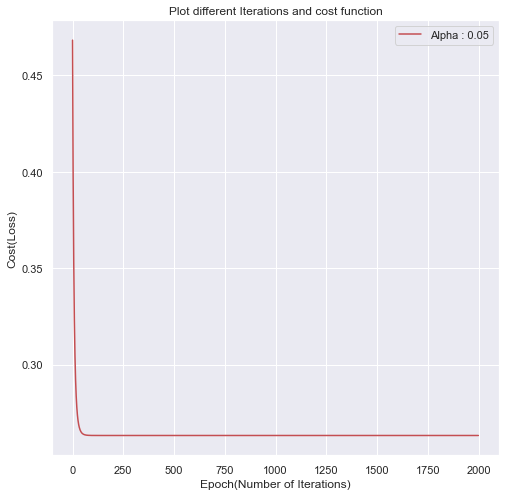

In [77]:
# Plot cost function and Iteration graph

plt.plot(cost_history_exp4, color = 'r', label=2000) # red line
# plt.plot(cost_df[2], color = 'g', label=lr_experiment[1]) # green line
# plt.plot(cost_df[3], color = 'b', label=lr_experiment[2]) # blue line
# plt.plot(cost_df[4], color = 'k', label=lr_experiment[3]) # black line
# plt.plot(cost_df[5], color = 'y', label=lr_experiment[4]) # yellow line
# plt.plot(cost_df[6], color = 'c', label=lr_experiment[5]) # cyan line


plt.xlabel("Epoch(Number of Iterations)")
plt.ylabel("Cost(Loss)")
plt.title("Plot different Iterations and cost function")

plt.legend(['Alpha : 0.05'])
plt.show()

# print(f'Epoch = {iterations}')
# print(f'Learning Rate(Alpha) = {learning_rate}')
# print(f'Lowest cost = {str(np.min(cost_history))}')
# print('-------------------------------------------------------------')
# print(f'Cost after {iterations} iterations = {str(cost_history[-1])}')



In [78]:
# Evaluation Metrics - Calculation of Mean Absolute Error(MAE), 
# Mean Squared Error (MSE), Root Mean Square Error(RMSE), R2 Score for Training

# Predict Output for Test Data
y_predicted_exp4 = np.dot(X_test_exp4, beta_value_exp4)

y_pred_train_exp4 = np.dot(X_train_exp4, beta_value_exp4)

print("------Training Performance Evaluation-------")
print("Mean Absolute Error(MAE):",mean_absolute_error(Y_train,y_pred_train_exp4))
print("Mean Squared Error(MSE):",mean_squared_error(Y_train,y_pred_train_exp4))
print("Root Mean Square Error(RMSE):",np.sqrt(mean_squared_error(Y_train,y_pred_train_exp4)))
print("R2:",r2_score(Y_train,y_pred_train_exp4))

# Evaluation Metrics - Calculation of Mean Absolute Error(MAE), 
# Mean Squared Error (MSE), Root Mean Square Error(RMSE), R2 Score for Testing
print("------Testing Performance Evaluation-------")
print("Mean Absolute Error (MAE):",mean_absolute_error(Y_test,y_predicted))
print("Mean Square Error (MSE):",mean_squared_error(Y_test,y_predicted))
print("Root Mean Square Error(RMSE):",np.sqrt(mean_squared_error(Y_test,y_predicted)))
print("R2:",r2_score(Y_test,y_predicted))


------Training Performance Evaluation-------
Mean Absolute Error(MAE): 0.539532680475236
Mean Squared Error(MSE): 0.5265424640916183
Root Mean Square Error(RMSE): 0.7256324579920735
R2: 0.4739728475184116
------Testing Performance Evaluation-------
Mean Absolute Error (MAE): 0.5585581725682806
Mean Square Error (MSE): 0.43334314828963405
Root Mean Square Error(RMSE): 0.658288043556644
R2: -0.1578655437690586


In [79]:
beta_value_exp4

Intercept                0.000000
Hour                     0.367111
Dew_point_temperature    0.237289
Seasons_Winter          -0.247644
Solar_Radiation          0.109458
Functioning_Day_Yes      0.261107
Visibility               0.186883
Wind_speed               0.023787
Seasons_Autumn           0.056815
dtype: float64

In [80]:
cost_history_exp4[1:10]

[0.44078627877578747,
 0.4172711390065548,
 0.39712840190838494,
 0.3798451656065654,
 0.36498979835786155,
 0.35219869018799266,
 0.34116520857249527,
 0.33163048581749405,
 0.3233757294752458]

In [81]:
final_lr_equation  = ['(0.367111)* Hour + (0.237289)* Dew_point_temperature + (-0.247644 )* Seasons_Winter + (0.109458 )* Solar_Radiation + (0.261107 )* Functioning_Day_Yes + (0.186883 )*Visibility + (0.023787 ) * Wind_speed + (0.056815) * Seasons_Autumn']
final_lr_equation

['(0.367111)* Hour + (0.237289)* Dew_point_temperature + (-0.247644 )* Seasons_Winter + (0.109458 )* Solar_Radiation + (0.261107 )* Functioning_Day_Yes + (0.186883 )*Visibility + (0.023787 ) * Wind_speed + (0.056815) * Seasons_Autumn']

In [82]:
# Describe and interpretation
# Describe your interpretation of the results. What do you think matters the most for predicting the rented bike count? 
# What other steps you could have taken with regards to modeling to get better results?

# Mentioned in the report